<a href="https://colab.research.google.com/github/phani-05/Shadowfox-AIML/blob/main/solution_car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
#reading the data
df = pd.read_csv('/content/sample_data/car.csv')
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:

#checking the no.of missing values
df.isnull().sum()

#Checking the size of dataset
df.shape

(301, 9)

In [ ]:
#Getting some information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#checkiong the distribution of categoerical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
#converting the text into numbers or ENCODING THE CATGEORICAL DATA

#encodsing fuel type data

df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)



/tmp/ipython-input-342762947.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
/tmp/ipython-input-342762947.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
/tmp/ipython-input-342762947.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to th

In [ ]:
#splitting the data into training and test data
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)


In [ ]:
#Model training
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)


LinearRegression()

In [ ]:
#model evalution
#prediction on training data

training_data_prediction = lin_reg_model.predict(X_train)


In [ ]:
#R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared error : ",error_score)


R squared error :  0.8799451660493711


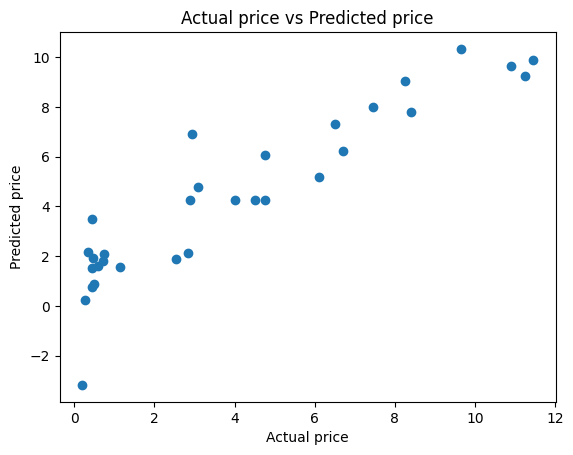

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()

In [ ]:
test_data_prediction = lin_reg_model.predict(X_test)

error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)


R squared error :  0.8365766715027051


##Lasso regression



In [ ]:
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

In [ ]:
training_data_prediction = lass_reg_model.predict(X_train)


In [ ]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8427856123435794


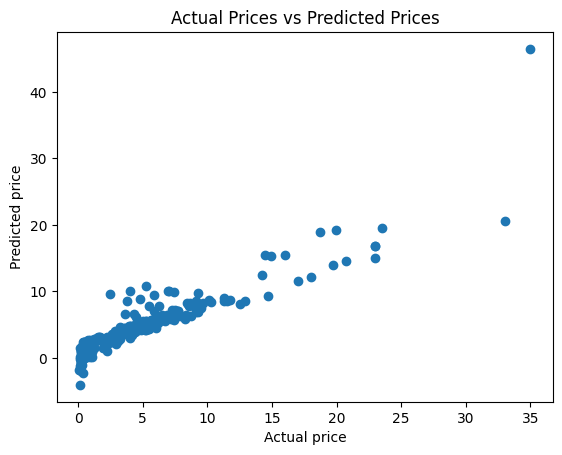

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
test_data_prediction = lass_reg_model.predict(X_test)

In [ ]:
#R aqured error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)


R squared error :  0.8709167941173195


In [ ]:
test_data_prediction = lass_reg_model.predict(X_test)

error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)


R squared error :  0.8709167941173195


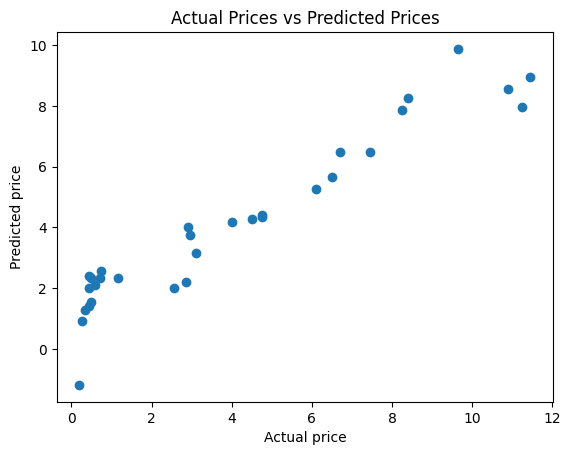

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

# Task
Predict the selling price of a car using the trained Lasso regression model (`lass_reg_model`) given the input features: 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type' (Petrol:0, Diesel:1, CNG:2), 'Seller_Type' (Dealer:0, Individual:1), 'Transmission' (Manual:0, Automatic:1), and 'Owner'. Then, display the predicted selling price.

## Prepare Input Data for Prediction

### Subtask:
Create a new DataFrame with input values for 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', and 'Owner'. Ensure the data types and order of columns match the training data (X_train). Remember that 'Fuel_Type', 'Seller_Type', and 'Transmission' should be the encoded numerical values (e.g., Petrol:0, Diesel:1, CNG:2; Dealer:0, Individual:1; Manual:0, Automatic:1).


**Reasoning**:
Create a new DataFrame for prediction using specified input values and ensure its structure matches the training data (X_train) for consistency in model input.



In [ ]:
new_car_data = {
    'Year': [2020],
    'Present_Price': [7.0],
    'Kms_Driven': [15000],
    'Fuel_Type': [0], # Petrol
    'Seller_Type': [0], # Dealer
    'Transmission': [0], # Manual
    'Owner': [0]
}

# Create a DataFrame from the dictionary
# Ensure column order matches X_train
input_df = pd.DataFrame(new_car_data, columns=X_train.columns)

print("Input DataFrame for prediction:")
print(input_df)
print("\nData types of input DataFrame:")
print(input_df.info())

Input DataFrame for prediction:
   Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
0  2020            7.0       15000          0            0             0      0

Data types of input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           1 non-null      int64  
 1   Present_Price  1 non-null      float64
 2   Kms_Driven     1 non-null      int64  
 3   Fuel_Type      1 non-null      int64  
 4   Seller_Type    1 non-null      int64  
 5   Transmission   1 non-null      int64  
 6   Owner          1 non-null      int64  
dtypes: float64(1), int64(6)
memory usage: 188.0 bytes
None


**Reasoning**:
Now that the input data for prediction is prepared, the next step is to use the trained Lasso regression model to make a prediction on this new input data.



In [ ]:
predicted_price = lass_reg_model.predict(input_df)
print(f"Predicted Selling Price: {predicted_price[0]:.2f} Lakhs")

Predicted Selling Price: 6.68 Lakhs
